#  <center> Air Traffic Passenger Data </center>
San Francisco International Airport Report on Monthly Passenger Traffic Statistics by Airline. Airport data is seasonal in nature, therefore any comparative analyses should be done on a period-over-period basis (i.e. January 2010 vs. January 2009) as opposed to period-to-period (i.e. January 2010 vs. February 2010). It is also important to note that fact and attribute field relationships are not always 1-to-1. For example, Passenger Counts belonging to United Airlines will appear in multiple attribute fields and are additive, which provides flexibility for the user to derive categorical Passenger Counts as desired.

In [54]:
#Toggle code button
from IPython.display import HTML
HTML('''
<script>
code_show=true;
function code_toggle(){
if (code_show){
$('div.input').hide();
document.getElementById('btn_toggle').value='Show Code';
}else{
$('div.input').show();
document.getElementById('btn_toggle').value='Hide Code';
}
code_show= !code_show
}
$(document).ready(code_toggle);
</script>
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    }
</style>
<form action="javascript:code_toggle()">
<input style = "float:right" type="submit" id="btn_toggle">
''')

In [55]:
#Import required libraries
import pandas as pd
import numpy as np
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
%matplotlib inline

In [56]:
#Visualization settings
sns.set_style(style='white')
sns.set(rc={
    'figure.figsize': (12,7),
    'axes.facecolor': 'white',
    'axes.grid': True,
    'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},
    font_scale=1.5)
custom_colors=["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)

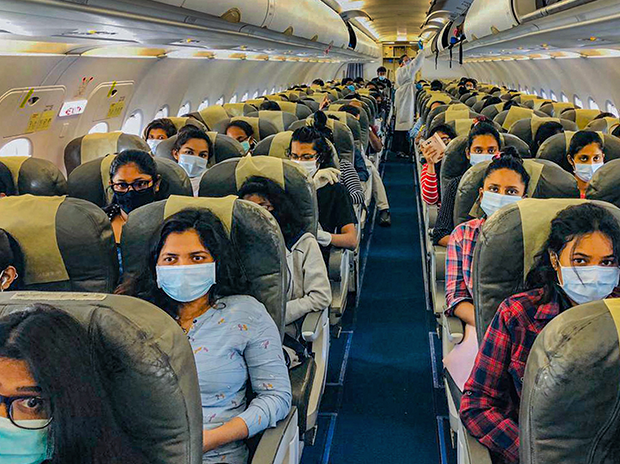

In [57]:
Image("passenger.png", width=500)

In [58]:
df_input = pd.read_csv('Air_Traffic_Passenger.csv')
print ("Data loaded successfully.")

Data loaded successfully.


## <center> Dataset description </center>

In [59]:
print ("Sample data frame")
df_input.head()

Sample data frame


,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [60]:
print (f"Shape of input data {df_input.shape} \n")
print (f"Features of input data: {df_input.columns}")

Shape of input data (15007, 16) 

Features of input data: Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count', 'Adjusted Activity Type Code',
       'Adjusted Passenger Count', 'Year', 'Month'],
      dtype='object')


<h3 style='background-color:yellow'>
    <i>15007 observations and 16 features present in the dataset.</i>
    </h3>

In [61]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              15007 non-null  int64 
 1   Operating Airline            15007 non-null  object
 2   Operating Airline IATA Code  14953 non-null  object
 3   Published Airline            15007 non-null  object
 4   Published Airline IATA Code  14953 non-null  object
 5   GEO Summary                  15007 non-null  object
 6   GEO Region                   15007 non-null  object
 7   Activity Type Code           15007 non-null  object
 8   Price Category Code          15007 non-null  object
 9   Terminal                     15007 non-null  object
 10  Boarding Area                15007 non-null  object
 11  Passenger Count              15007 non-null  int64 
 12  Adjusted Activity Type Code  15007 non-null  object
 13  Adjusted Passenger Count     15

<h3 style='background-color:yellow'>
    <i> 4 Integer features. </i> <br>
    <i>12 String features. </i>
    <h3>

Null observaions in the data: 
 Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64


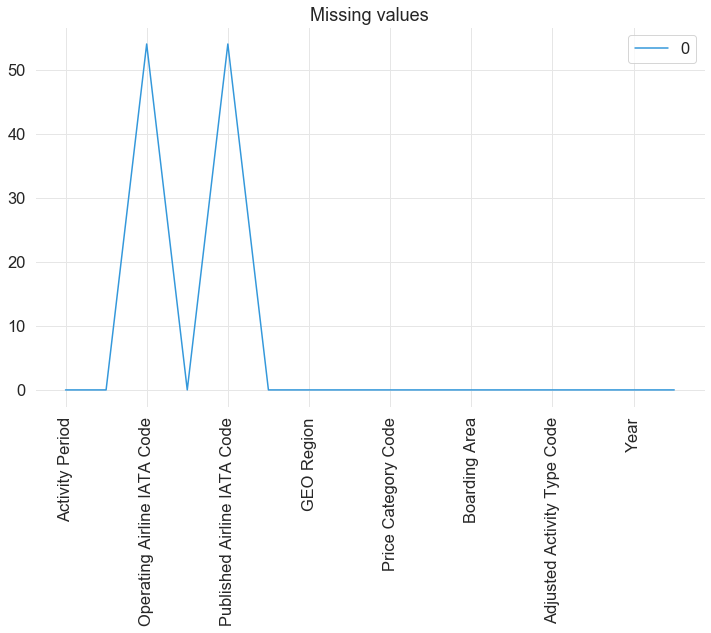

In [62]:
print ("Null observaions in the data: \n", df_input.isnull().sum())
pd.DataFrame(df_input.isnull().sum()).plot.line()
plt.title("Missing values");
plt.xticks(rotation=90);

<h3 style='background-color:yellow'>
    <i> Operating Airline IATA Code, Published Airline IATA code having 54 NULL values. </i>
    </h3>

In [63]:
for col_name in df_input.columns:
    df_input.rename(columns={col_name : col_name.replace(" ", "")}, inplace=True)
print ("Removed space from Feature Names n dataset.")

Removed space from Feature Names n dataset.


In [64]:
print ("Feature names after removing spaces: \n")
df_input.columns

Feature names after removing spaces: 



Index(['ActivityPeriod', 'OperatingAirline', 'OperatingAirlineIATACode',
       'PublishedAirline', 'PublishedAirlineIATACode', 'GEOSummary',
       'GEORegion', 'ActivityTypeCode', 'PriceCategoryCode', 'Terminal',
       'BoardingArea', 'PassengerCount', 'AdjustedActivityTypeCode',
       'AdjustedPassengerCount', 'Year', 'Month'],
      dtype='object')

## <center> Features</center>

### 1. ActivityPeriod

In [65]:
print ("Unique ActivityPeriod: \n")
df_input.ActivityPeriod.unique()

Unique ActivityPeriod: 



array([200507, 200508, 200509, 200510, 200511, 200604, 200512, 200601,
       200602, 200603, 200605, 200607, 200606, 200608, 200609, 200707,
       200610, 200611, 200612, 200701, 200702, 200703, 200704, 200705,
       200706, 200708, 200709, 200805, 200710, 200711, 200712, 200801,
       200802, 200803, 200804, 201103, 200806, 201107, 201110, 200807,
       200808, 200809, 200810, 200811, 200812, 200901, 201206, 200902,
       200903, 200904, 200905, 200906, 200907, 200908, 200909, 200910,
       200911, 200912, 201001, 201002, 201003, 201004, 201005, 201006,
       201007, 201008, 201009, 201010, 201011, 201012, 201101, 201102,
       201104, 201105, 201106, 201108, 201109, 201111, 201112, 201201,
       201202, 201203, 201204, 201205, 201207, 201208, 201209, 201210,
       201211, 201212, 201306, 201301, 201302, 201303, 201304, 201305,
       201307, 201308, 201309, 201310, 201407, 201311, 201312, 201507,
       201401, 201402, 201403, 201404, 201405, 201406, 201603, 201408,
      

<h3 style='background-color:yellow; font-style: italic;'>
ActivityPeriod looks like combination of Year and Month which is already available in the dataset as seperate features. 
    </h3>

### 2. OperatingAirline

In [66]:
df_input.OperatingAirline.value_counts()

United Airlines - Pre 07/01/2013    2154
SkyWest Airlines                     963
United Airlines                      892
Alaska Airlines                      751
Delta Air Lines                      386
                                    ... 
Xtra Airways                           2
Pacific Aviation                       2
Atlas Air, Inc                         2
Evergreen International Airlines       2
Boeing Company                         1
Name: OperatingAirline, Length: 77, dtype: int64

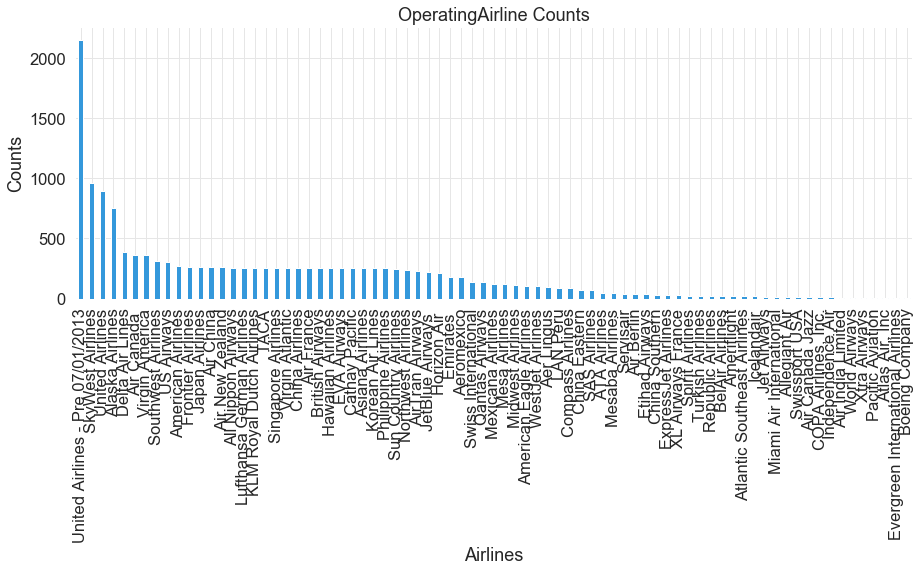

In [67]:
plt.figure(figsize=(15,5))
df_input.OperatingAirline.value_counts().plot.bar().set_title("OperatingAirline Counts");
plt.ylabel("Counts");
plt.xlabel("Airlines");

### 3. OperatingAirlineIATACode
These are code representing specific Airline.

In [68]:
print ("Unique OperatingAirlineIATACode: \n")
df_input.OperatingAirlineIATACode.unique()

Unique OperatingAirlineIATACode: 



array(['TZ', 'AC', 'CA', 'AF', 'NZ', 'FL', 'AS', 'NH', 'AA', 'MQ', 'OZ',
       'EV', '4T', 'BA', 'CX', 'CI', 'DL', 'BR', 'F9', 'HA', 'QX', 'FI',
       'DH', 'JL', 'KL', 'KE', 'LH', 'YV', 'MX', 'YX', 'NW', 'PR', 'SQ',
       'OO', 'SY', 'TA', 'US ', 'UA', 'VS', 'WS', nan, 'GL', 'QK', 'QF',
       'A8', 'NK', 'XP', 'EZ', 'AM', 'B6', 'XE', 'WN', 'VX', 'EI', 'G4',
       '9W', 'BBB', 'EK', 'XJ', 'WO', 'AB', 'RW', 'LX', 'LP', 'SE', 'MU',
       'SK', '5Y', 'CP', 'EY', 'CZ', 'TK', 'CM', 'AI'], dtype=object)

### 4. PublishedAirline

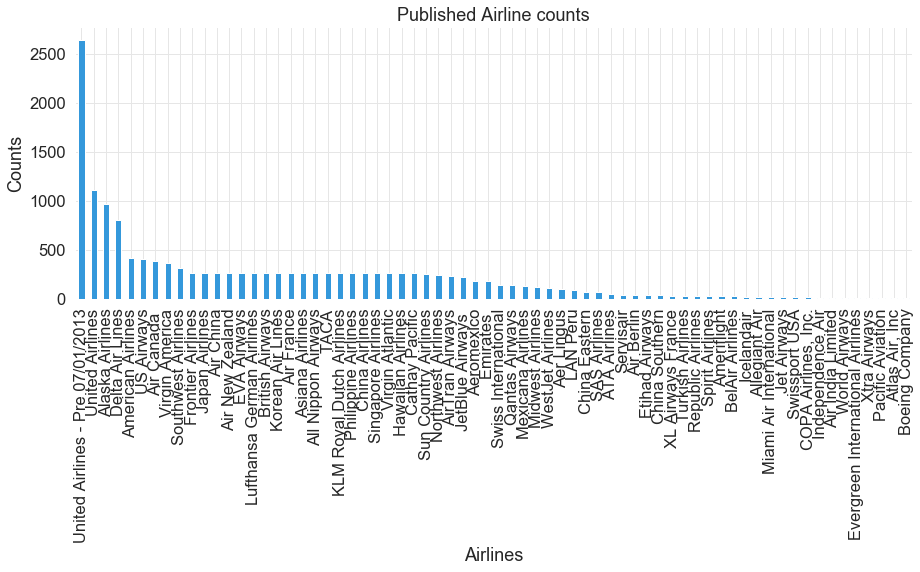

In [69]:
plt.figure(figsize=(15,5))
df_input.PublishedAirline.value_counts().plot.bar();
plt.title("Published Airline counts");
plt.ylabel("Counts");
plt.xlabel("Airlines");

In [70]:
print ("Number of records with Published Airline and Operating Airline with different values:", 
       df_input[df_input["PublishedAirline"] != df_input["OperatingAirline"]].shape[0])

Number of records with Published Airline and Operating Airline with different values: 1602


In [71]:
#Visualization settings
sns.set_style(style='white')
sns.set(rc={
    'figure.figsize': (12,7),
    'axes.facecolor': 'white',
    'axes.grid': True,
    'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},
    font_scale=1.5)
custom_colors=["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)

### 5. Published Airline IATA code

In [72]:
print ("Unique values for PublishedAirlineIATACode: \n", 
df_input.PublishedAirlineIATACode.unique())

Unique values for PublishedAirlineIATACode: 
 ['TZ' 'AC' 'CA' 'AF' 'NZ' 'FL' 'AS' 'NH' 'AA' 'OZ' 'DL' '4T' 'BA' 'CX'
 'CI' 'BR' 'F9' 'HA' 'FI' 'DH' 'JL' 'KL' 'KE' 'LH' 'US ' 'MX' 'YX' 'NW'
 'PR' 'SQ' 'UA' 'SY' 'TA' 'VS' 'WS' nan 'GL' 'QF' 'A8' 'NK' 'XP' 'EZ' 'AM'
 'B6' 'WN' 'VX' 'EI' 'G4' '9W' 'BBB' 'EK' 'WO' 'AB' 'RW' 'LX' 'LP' 'SE'
 'MU' 'SK' '5Y' 'EY' 'CZ' 'TK' 'CM' 'AI']


### 6. Geo Summary

In [73]:
print ("Unique values : ", df_input.GEOSummary.unique())
val_cnts=df_input.GEOSummary.value_counts()
print ("Value counts : \n", val_cnts)

Unique values :  ['Domestic' 'International']
Value counts : 
 International    9210
Domestic         5797
Name: GEOSummary, dtype: int64


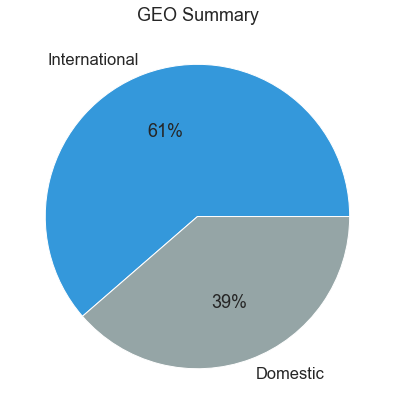

In [74]:
plt.pie(df_input.GEOSummary.value_counts(),labels=val_cnts.index , autopct=lambda s: f'{s:.0f}%');
plt.title("GEO Summary");

<h3 style='background-color:yellow; font-style: italic;'>
    61% Airlines are from International and rest 39% Airlines are for Domestic
    </h3>

### 7. Geo Region

In [75]:
print ("Unique values for GEO Region: \n",
      df_input.GEORegion.unique())

Unique values for GEO Region: 
 ['US' 'Canada' 'Asia' 'Europe' 'Australia / Oceania' 'Mexico'
 'Central America' 'Middle East' 'South America']


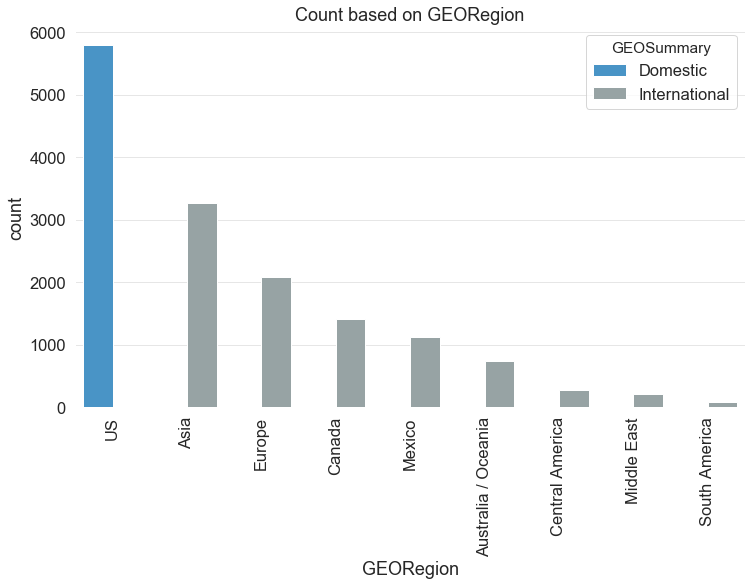

In [76]:
sns.countplot(data=df_input,x="GEORegion",hue="GEOSummary",order=df_input.GEORegion.value_counts().index);
plt.xticks(rotation=90);
plt.title("Count based on GEORegion");

<h3 style='background-color:yellow; font-style: italic;'>
    Airlines flying with in US is considered as Demoestic. <br>
    International Airlines are travelling to Asia,Europe,Canada,Mexico,Australia/Oceania,Central America and South America.

### 8. Activity Type Code
A description of the physical action a passenger took in relation to a flight, which includes boarding a flight (“enplanements”), getting off a flight (“deplanements”) and transiting to another location (“in-transit”).

In [77]:
print ("Unique values : " , df_input.ActivityTypeCode.unique())

Unique values :  ['Deplaned' 'Enplaned' 'Thru / Transit']


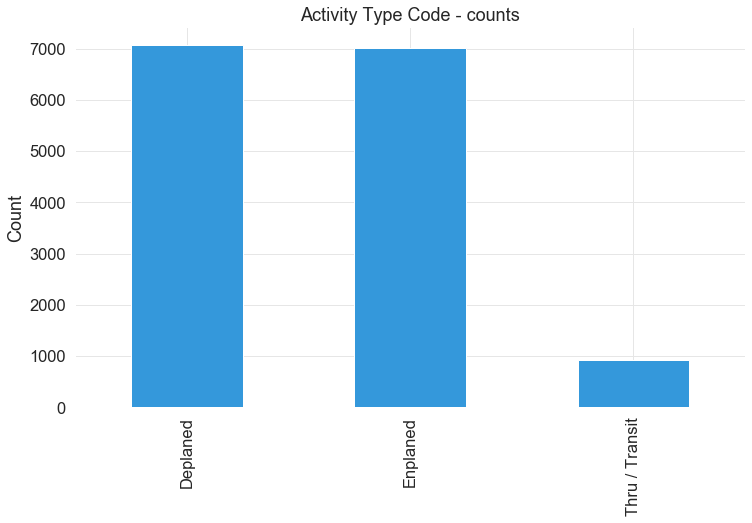

In [78]:
df_input.ActivityTypeCode.value_counts().plot.bar();
plt.title ("Activity Type Code - counts");
plt.ylabel("Count");

### 9. Price Category Code
A categorization of whether a Published Airline is a low-cost carrier or not a low-cost carrier.

In [79]:
print ("Unique Values: ", df_input.PriceCategoryCode.unique())

Unique Values:  ['Low Fare' 'Other']


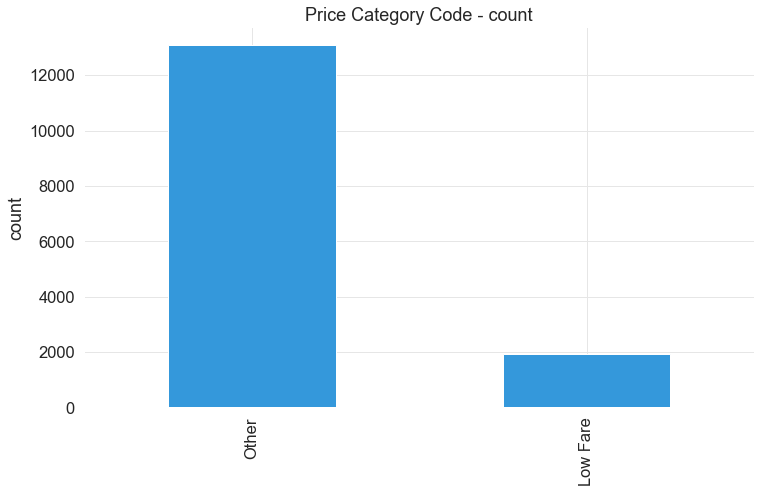

In [80]:
df_input.PriceCategoryCode.value_counts().plot.bar();
plt.title("Price Category Code - count")
plt.ylabel("count");

<h3 style='background-color:yellow; font-style: italic;'>
    Categorical value having values : Low Fare and Other
    </h3>

### 10. Terminal
The airport terminal designations at Airport where passenger activity took place.

In [81]:
print ("Unique values: ", df_input.Terminal.unique())

Unique values:  ['Terminal 1' 'International' 'Terminal 3' 'Other' 'Terminal 2']


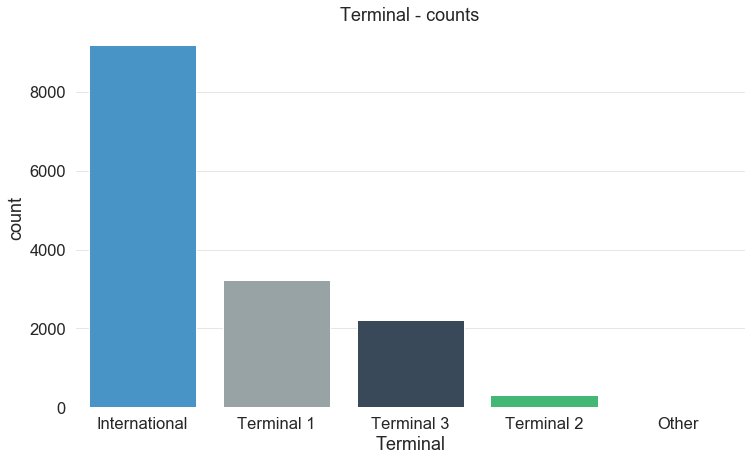

In [82]:
sns.countplot(df_input.Terminal,order=df_input.Terminal.value_counts().index);
plt.title("Terminal - counts");

### 11. Boarding Area
The airport boarding area designations at Airport where passenger activity took place

In [83]:
print ("Unique values: ", df_input.BoardingArea.unique())

Unique values:  ['B' 'G' 'A' 'E' 'C' 'F' 'Other' 'D']


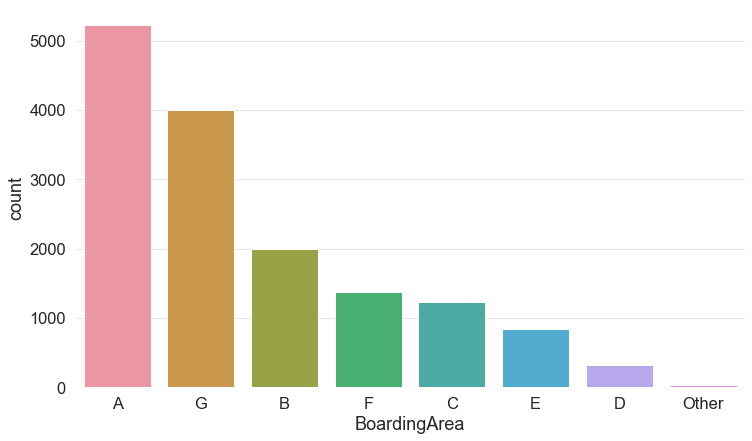

In [84]:
sns.countplot(df_input.BoardingArea, order=df_input.BoardingArea.value_counts().index);

### 12. Passenger Count"

<h3 style='background-color:yellow; font-style: italic;'>
    Passenger count is a Discrete variable.
    </h3>

In [85]:
print ("Passenger count details: \n", df_input.PassengerCount.describe())

Passenger count details: 
 count     15007.000000
mean      29240.521090
std       58319.509284
min           1.000000
25%        5373.500000
50%        9210.000000
75%       21158.500000
max      659837.000000
Name: PassengerCount, dtype: float64


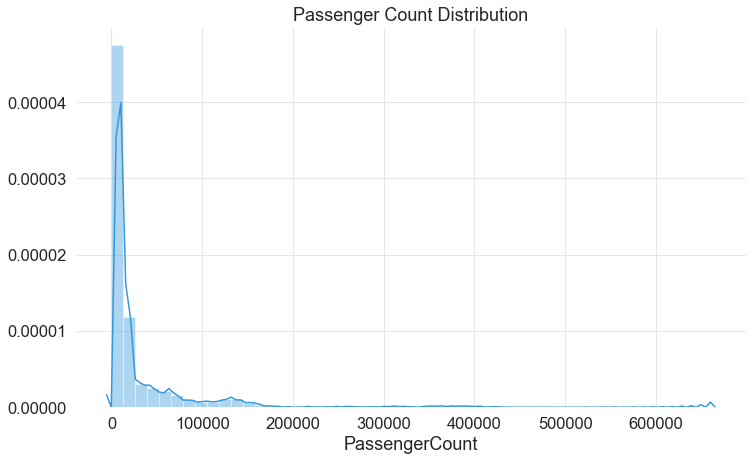

In [86]:
sns.distplot(df_input.PassengerCount);
plt.title ("Passenger Count Distribution");

### 13. Year and Month

In [87]:
print ("Unique values of Year: \n",df_input.Year.unique())
print ()
print ("Unique values of Months: \n", df_input.Month.unique())

Unique values of Year: 
 [2005 2006 2007 2008 2011 2009 2012 2010 2013 2014 2015 2016]

Unique values of Months: 
 ['July' 'August' 'September' 'October' 'November' 'April' 'December'
 'January' 'February' 'March' 'May' 'June']


In [88]:
group_year=df_input.groupby("Year")

In [89]:
year_list=[]
month_list=[]
passenger_cnt=[]
for yr in df_input.Year.unique():
    yr_df=group_year.get_group(yr)
    month_list.append (list(yr_df.Month.unique()))
    year_list.append(yr)
    passenger_cnt.append(yr_df.PassengerCount.sum())

In [90]:
df_year_summary=pd.DataFrame({"Year": pd.Series(year_list), "PassengerCount": pd.Series(passenger_cnt), "Months": month_list})

In [91]:
x_year,y_month=[],[]
for line in df_year_summary.itertuples():
    for mon in line[3]:
        x_year.append(line[1])
        y_month.append(mon)

In [92]:
df=pd.DataFrame({"year":pd.Series(x_year),"Months":pd.Series(y_month)})

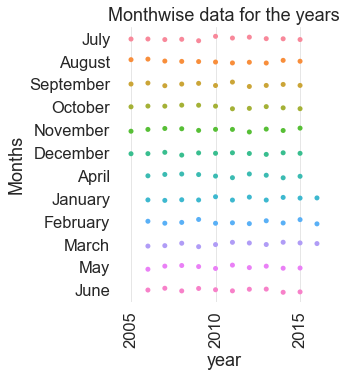

In [93]:
sns.catplot(data=df, x="year",y="Months");
plt.xticks(rotation=90);
plt.title("Monthwise data for the years");

<h3 style='background-color:yellow; font-style: italic;'>
Dataset doesn't have sufficient data for all months in 2005 and 2016.
    </h3>

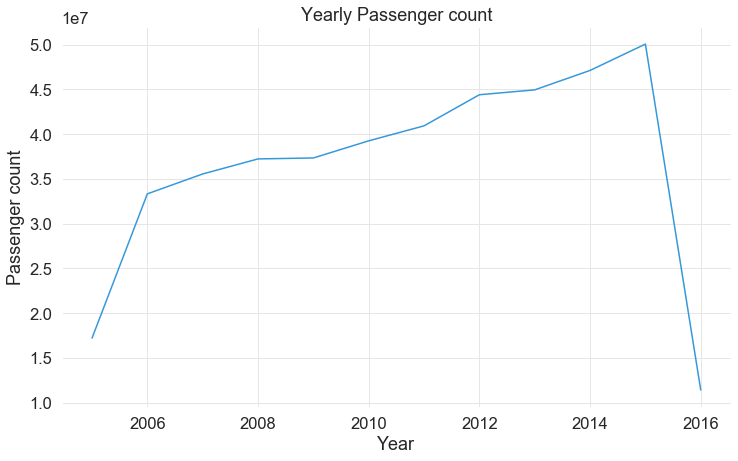

In [94]:
sns.lineplot(x=year_list,y=passenger_cnt);
plt.title("Yearly Passenger count");
plt.xlabel("Year");
plt.ylabel("Passenger count");

<h3 style='background-color:yellow; font-style: italic;'>
    From 2005 to 2015, there is an increase in total passengers count.

In [95]:
# Delete temporary dataframes
del(df_year_summary)
del(yr_df)

In [96]:
df_dummy=pd.DataFrame(columns=["Year","Month","PassengerCount"])

In [97]:
yr_unique_list=df_input.Year.unique().tolist()
#Remove the year 2005 for grapghical look purpose
yr_unique_list.pop(0)
month_list=calendar.month_name[1:13]
df_dummy=pd.DataFrame(columns=["Year","Month","PassengerCount"])
df_deplaned =df_dummy.copy()

for yr in yr_unique_list:
    group_month=df_input.query("ActivityTypeCode=='Enplaned' & Year==@yr").groupby("Month")
    group_deplaned= df_input.query("ActivityTypeCode=='Deplaned' & Year==@yr").groupby("Month")
    for mnth in month_list:
        try:
            df_mn=group_month.get_group(mnth)
            #print (yr,mnth,df_mn["PassengerCount"].sum())
            df_dummy=df_dummy.append(pd.DataFrame({"Year":[yr],"Month":[mnth],"PassengerCount":[df_mn["PassengerCount"].sum()]}))
            df_mn_deplane = group_deplaned.get_group(mnth)
            df_deplaned = df_deplaned.append(pd.DataFrame({"Year":[yr],"Month":[mnth],"PassengerCount":[df_mn_deplane["PassengerCount"].sum()]}))
        except:
            pass

In [98]:
#Convert the PassengerCount and Year columns to numeric
df_dummy[["PassengerCount","Year"]]=df_dummy[["PassengerCount","Year"]].apply(pd.to_numeric)
df_deplaned[["PassengerCount","Year"]]=df_deplaned[["PassengerCount","Year"]].apply(pd.to_numeric)

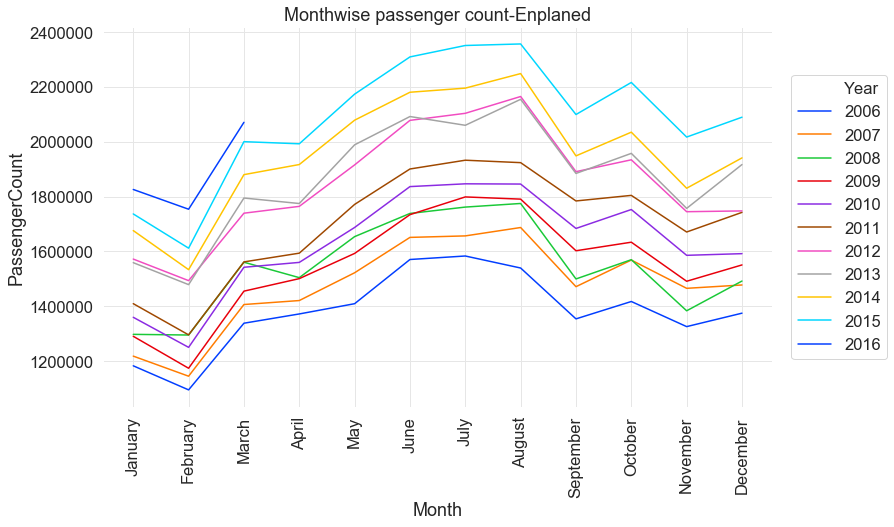

In [99]:
sns.lineplot(data=df_dummy,x="Month",y="PassengerCount",hue="Year",sort=False,palette='bright');
plt.xticks(rotation=90);
plt.legend(loc="center", bbox_to_anchor=(1.1,0.5));
plt.title("Monthwise passenger count-Enplaned");

<h3 style='background-color:yellow; font-style: italic;'>
    In 2015, August month got the highest number of people enplaned.
    </h3>

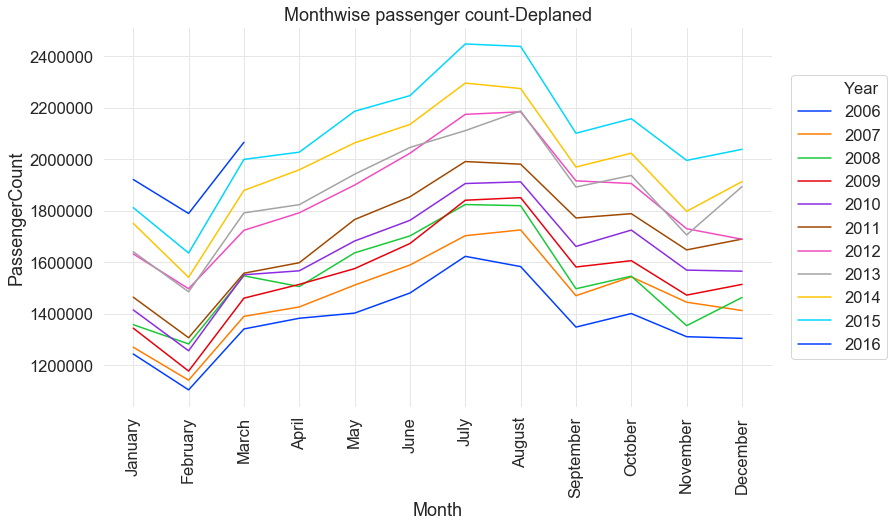

In [100]:
sns.lineplot(data=df_deplaned,x="Month",y="PassengerCount",hue="Year",sort=False,palette='bright');
plt.xticks(rotation=90);
plt.legend(loc="center", bbox_to_anchor=(1.1,0.5));
plt.title("Monthwise passenger count-Deplaned");

In [101]:
del([df_deplaned,df_dummy,df_mn,df_mn_deplane])

In [102]:
df_2015=df_input.query("Year == 2015 & ActivityTypeCode=='Enplaned'").copy()

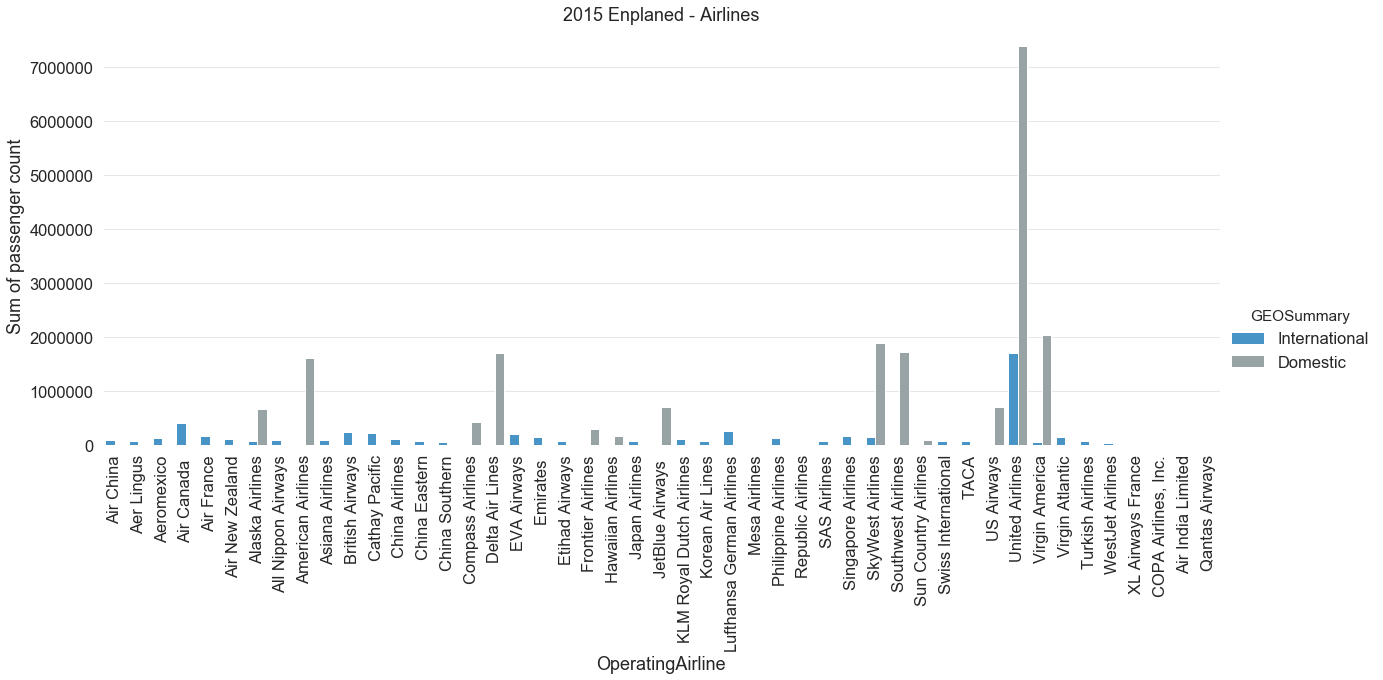

In [103]:
sns.catplot(data=df_2015,x="OperatingAirline",y="PassengerCount",hue="GEOSummary",kind="bar",height=7,aspect=2.5,estimator=sum,ci=None);
plt.xticks(rotation=90,label="Airlines");
plt.ylabel("Sum of passenger count")
plt.title("2015 Enplaned - Airlines");

<h3 style='background-color:yellow; font-style: italic;'>
    In 2015 most passengers enplaned 'United Airlines' for their 'Domestic' and 'International' Travel.
    </h3>

In [104]:
print ("Price category used more while enplaning in United Airlines in the year 2015: \n")
df_2015.query("OperatingAirline=='United Airlines'")["PriceCategoryCode"].unique()

Price category used more while enplaning in United Airlines in the year 2015: 



array(['Other'], dtype=object)

In [105]:
#Delete temporary dataframes
del([df,df_2015])